# importing libraries

In [1]:
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib import pyplot 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# from sklearn.datasets import make_classification


# working directory

In [2]:
os.chdir("E:\ml\Edwisor_project2\FinalProject")

# loading dataset

In [3]:
df = pd.read_csv("bank-loan.csv")

# Exploratory data analysis

In [4]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

# High Level Analysis

In [5]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


1. Age Age of each customer                      Numerical
2. Education Education categories                Categorical
3. Employment Employment status -                Numerical
    Corresponds to job
    status and being
    converted to numeric
    format
4. Address Geographic area -                     Numerical
    Converted to numeric
    values
5  Income Gross Income of each                   Numerical
    customer
6. debtinc Individual’s debt                     Numerical
    payment to his or her
    gross income
7. creddebt debt-to-credit ratio is a            Numerical
    measurement of how
    much you owe your
    creditors as a
    percentage of your
    available credit (credit
    limits)
8. othdebt Any other debts                       Numerical




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.8 KB


In [7]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


# Null Check

In [8]:
# null values present=====> 150 values are missing
# [df["default"].isna()]
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

# Missing value analysis

In [9]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(df))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Mising_perc_python.csv", index = False)

In [10]:
#Impute with median -unsure because cannot fill in missing values for them
# df['default'] = df['default'].fillna(df['default'].median())

# Null correction

In [11]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
age         700 non-null int64
ed          700 non-null int64
employ      700 non-null int64
address     700 non-null int64
income      700 non-null int64
debtinc     700 non-null float64
creddebt    700 non-null float64
othdebt     700 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


# Outlier Analysis

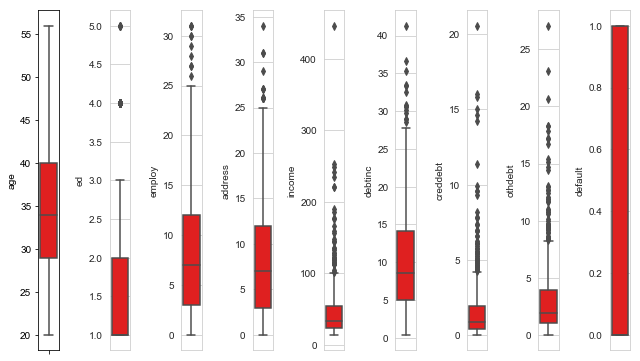

In [12]:
#Plot boxplot to visualize Outliers
%matplotlib inline  
l = df.columns.values
number_of_columns=9
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='red',orient='v')
    plt.tight_layout()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


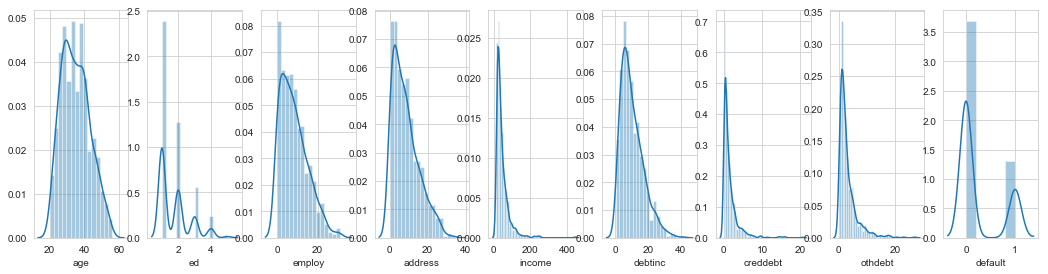

In [13]:
#To check distribution-Skewness
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 
#All independent variables are right skewed/positively skewed.

In [14]:
#save numeric names
cnames =  ['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default']

# Feature Selection

In [15]:
# tm = df.groupby("default").mean()
# tm
# df.groupby("default")["employ"].describe()
# df.groupby("default")["age"].describe()
# df.groupby("default")["ed"].describe()
df.groupby("default")["address"].describe()
# df.groupby("default")["income"].describe() 
# df.groupby("default")["debtinc"].describe()
# df.groupby("default")["creddebt"].describe()
# df.groupby("default")["othdebt"].describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0.0,517.0,8.945841,7.000621,0.0,3.0,8.0,13.0,34.0
1.0,183.0,6.393443,5.925208,0.0,2.0,5.0,10.0,29.0


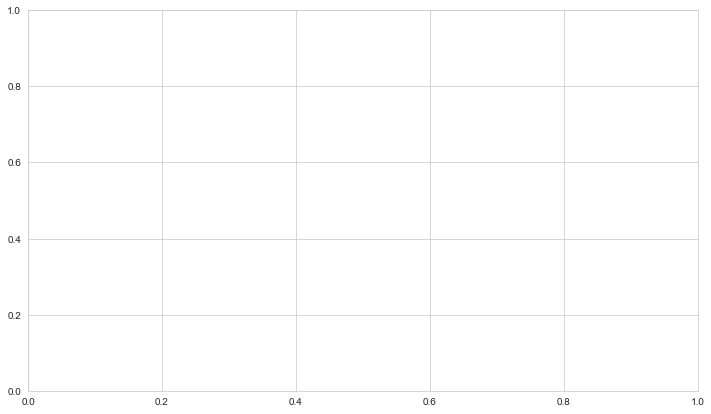

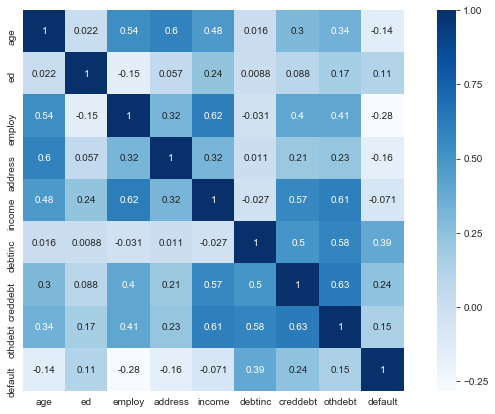

In [16]:
df_corr = df
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(12, 7))
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(12, 7))
#Generate correlation matrix
corr = df_corr.corr()
#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap='Blues',
            square=True,annot= True, ax=ax)
# Dark shades represents positive correlation while lighter shades represents negative correlation.


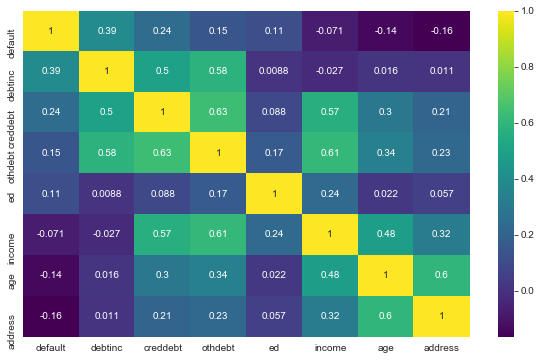

In [17]:
#default correlation matrix
k = 8 #number of variables for heatmap
cols = df.corr().nlargest(k, 'default')['default'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [18]:
df.drop("address", axis="columns", inplace=True)

.# dropping correlated variable

# Separate X and Y

In [19]:
X = df.drop(['default'], axis=1)
y = df['default']

# Modeling 

In [20]:
#dividing data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=200)

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression(penalty='l2', C=0.1)
logreg.fit(X_train,y_train)
#predict new test cases
Log_Predictions = logreg.predict(X_test)
print(logreg.score(X_test,y_test))

0.8428571428571429


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, Log_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

print("Defaulted", sum(Log_Predictions!=0))
print("Non-defaulted ", sum(Log_Predictions==0))
#Results
CM

84.28571428571429
50.0
Defaulted 22
Non-defaulted  118


col_0,0.0,1.0
default,,
0.0,105,9
1.0,13,13


0.16767881241565452


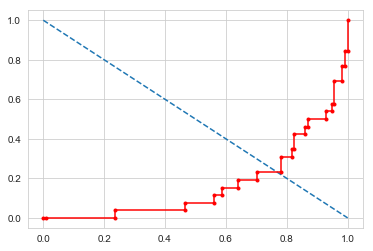

In [39]:
#ROC curve and AUC
prob=logreg.predict_proba(X_test)
# print(prob)
prob=prob[:,0]
auc=roc_auc_score(y_test,prob)
print(auc)
fpr,tpr,thresh=roc_curve(y_test,prob)
plt.plot([0,1],[1,0],linestyle='--')
plt.plot(fpr,tpr,marker='.',color='red',label="Logistic regression")

In [24]:
#Decision Tree
from sklearn import tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

In [25]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

print("Defaulted", sum(C50_Predictions!=0))
print("Non-defaulted ", sum(C50_Predictions==0))
#Results
CM

74.28571428571429
65.38461538461539
Defaulted 28
Non-defaulted  112


col_0,0.0,1.0
default,,
0.0,95,19
1.0,17,9


0.41025641025641024


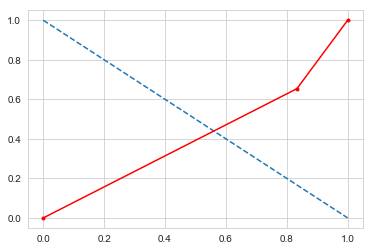

In [26]:
#ROC curve and AUC
prob=C50_model.predict_proba(X_test)
# print(prob)
prob=prob[:,0]
auc=roc_auc_score(y_test,prob)
print(auc)
fpr,tpr,thresh=roc_curve(y_test,prob)
plt.plot([0,1],[1,0],linestyle='--')
plt.plot(fpr,tpr,marker='.',color='red')

In [27]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 200).fit(X_train, y_train)

In [28]:
RF_Predictions = RF_model.predict(X_test)

In [29]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

print("Defaulted", sum(RF_Predictions!=0))
print("Non-defaulted ", sum(RF_Predictions==0))
CM

83.57142857142857
65.38461538461539
Defaulted 15
Non-defaulted  125


col_0,0.0,1.0
default,,
0.0,108,6
1.0,17,9


0.16784750337381915


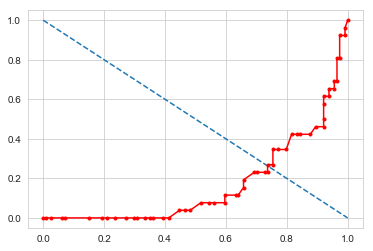

In [30]:
#ROC curve and AUC
prob=RF_model.predict_proba(X_test)
# print(prob)
prob=prob[:,0]
auc=roc_auc_score(y_test,prob)
print(auc)
fpr,tpr,thresh=roc_curve(y_test,prob)
plt.plot([0,1],[1,0],linestyle='--')
plt.plot(fpr,tpr,marker='.',color='red')

In [31]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [32]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [33]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
# accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

print("Defaulted", sum(NB_Predictions!=0))
print("Non-defaulted ", sum(NB_Predictions==0))
CM

81.42857142857143
76.92307692307692
Defaulted 12
Non-defaulted  128


col_0,0.0,1.0
default,,
0.0,108,6
1.0,20,6


0.21120107962213228


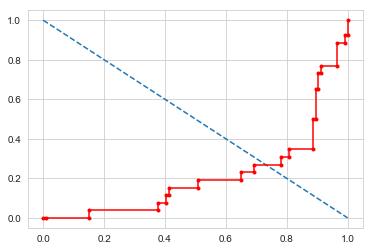

In [34]:
#ROC curve and AUC
prob=NB_model.predict_proba(X_test)
# print(prob)
prob=prob[:,0]
auc=roc_auc_score(y_test,prob)
print(auc)
fpr,tpr,thresh=roc_curve(y_test,prob)
plt.plot([0,1],[1,0],linestyle='--')
plt.plot(fpr,tpr,marker='.',color='red')

In [35]:
#XGB classifier
from xgboost import XGBClassifier
XG_model = XGBClassifier(n_estimators = 200).fit(X_train, y_train)

In [36]:
XG_Predictions = XG_model.predict(X_test)

In [37]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, XG_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

print("Defaulted", sum(XG_Predictions!=0))
print("Non-defaulted ", sum(XG_Predictions==0))
CM

81.42857142857143
65.38461538461539
Defaulted 18
Non-defaulted  122


col_0,0.0,1.0
default,,
0.0,105,9
1.0,17,9


0.21120107962213228


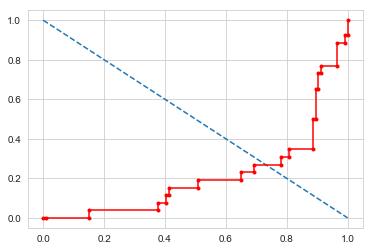

In [38]:
#ROC curve and AUC
prob=NB_model.predict_proba(X_test)
# print(prob)
prob=prob[:,0]
auc=roc_auc_score(y_test,prob)
print(auc)
fpr,tpr,thresh=roc_curve(y_test,prob)
plt.plot([0,1],[1,0],linestyle='--')
plt.plot(fpr,tpr,marker='.',color='red')

# ROC and AUC curves

# AUC =1 ROC touches (0,1)
#     =0.5 ROC diagonal line
#     =0 ROC touches (1,0) 